# <div align="center"> **Task 3 : Classification**

#### Dataset access link:  https://www.kaggle.com/fedesoriano/heart-failure-prediction.

## Cleaning the data

In [652]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns

In [653]:
# Uploading the dataset
df3 = pd.read_csv(r"C:\Users\DELL\Documents\Heart Failure.csv")

In [654]:
df3.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [655]:
# Checking the number of rows and columns in the dataset
df3.shape

(918, 12)

In [656]:
# Checking the datatypes
df3.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [657]:
# Checking for missing values
print("\nMissing Values Per Column:")
print(df3.isnull().sum())


Missing Values Per Column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [658]:
# Checking for duplicate rows
duplicates = df3.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


In [659]:
# Overview of the descriptive statistics (central tendency, dispersion, and distribution) of the dataframe
df3.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Plotting box plots for numerical columns to identify outliers

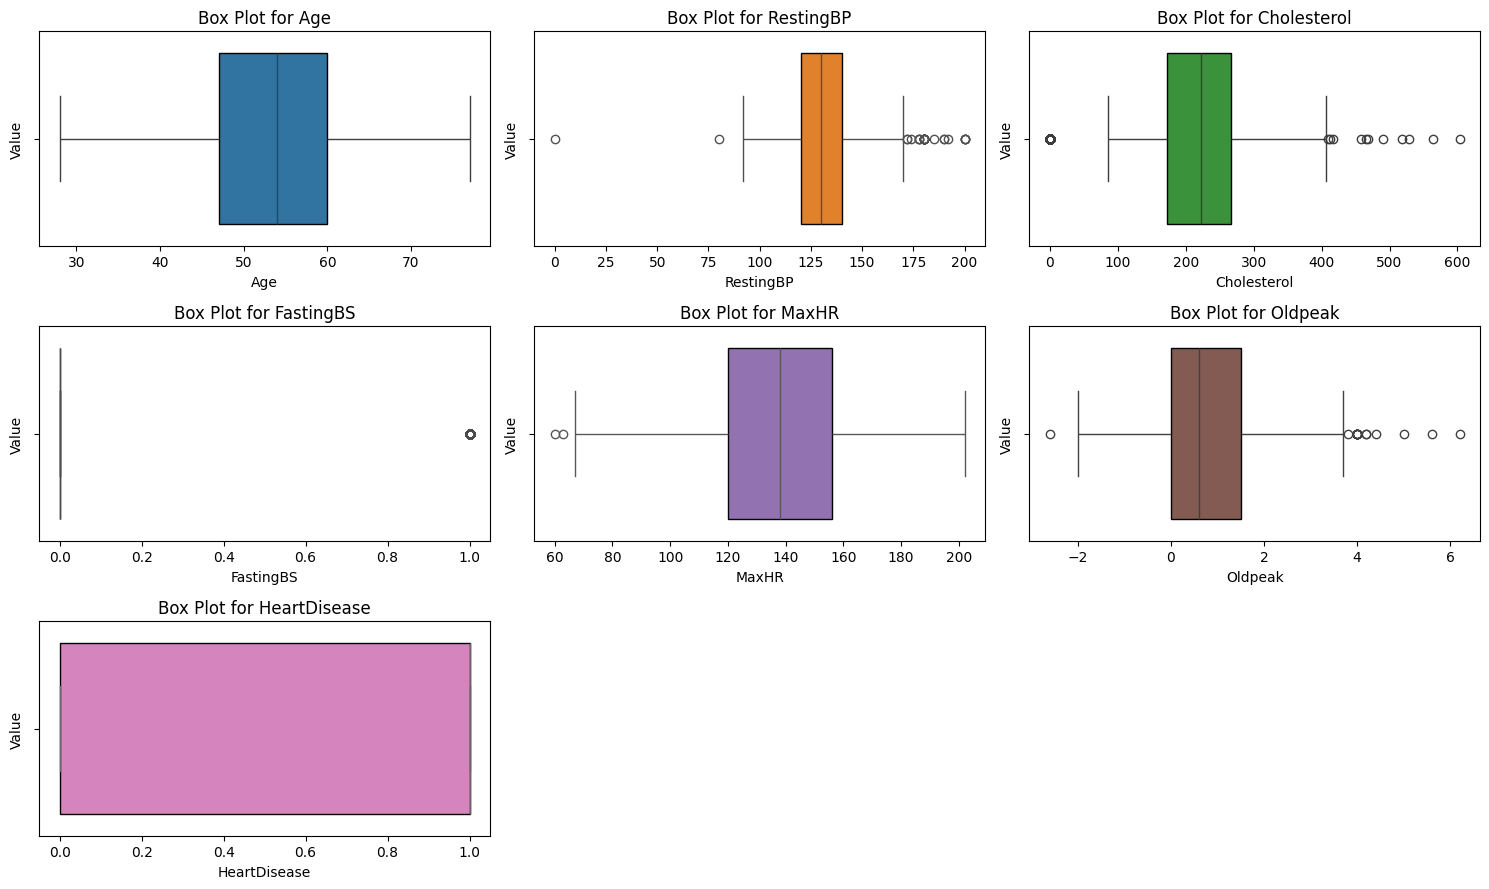

In [660]:
numerical_columns = df3.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numerical_columns)

rows = (num_cols + 2) // 3 
cols = 3  
fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows), dpi=100)
axes = axes.flatten()

palette = sns.color_palette('tab10', n_colors=num_cols)

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df3, x=col, ax=axes[i], color=palette[i], boxprops=dict(edgecolor='black'))
    axes[i].set_title(f'Box Plot for {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Value', fontsize=10)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

In [661]:
# Creating a DataFrame to store min and max values
min_max_table = pd.DataFrame({
    'Column': numerical_columns,
    'Minimum Value': [df3[col].min() for col in numerical_columns],
    'Maximum Value': [df3[col].max() for col in numerical_columns]
})

from tabulate import tabulate    # Display the table
print(tabulate(min_max_table, headers='keys', tablefmt='fancy_grid', showindex=False))

╒══════════════╤═════════════════╤═════════════════╕
│ Column       │   Minimum Value │   Maximum Value │
╞══════════════╪═════════════════╪═════════════════╡
│ Age          │            28   │            77   │
├──────────────┼─────────────────┼─────────────────┤
│ RestingBP    │             0   │           200   │
├──────────────┼─────────────────┼─────────────────┤
│ Cholesterol  │             0   │           603   │
├──────────────┼─────────────────┼─────────────────┤
│ FastingBS    │             0   │             1   │
├──────────────┼─────────────────┼─────────────────┤
│ MaxHR        │            60   │           202   │
├──────────────┼─────────────────┼─────────────────┤
│ Oldpeak      │            -2.6 │             6.2 │
├──────────────┼─────────────────┼─────────────────┤
│ HeartDisease │             0   │             1   │
╘══════════════╧═════════════════╧═════════════════╛


A cholesterol level of zero is impossible in a living person. Cholesterol is essential for forming cell membranes, producing hormones, and supporting other vital functions in the body.

A RestingBP of zero is also impossible in a living person, as it indicates an absence of blood flow.

In [662]:
#Removing rows with zero values in the 'RestingBP' and 'Cholesterol' columns

df3 = df3[df3['RestingBP'] != 0]
df3 = df3[df3['Cholesterol'] != 0]

In [663]:
#Viewing the shape of dataset again to check the number of rows removed
df3.shape

(746, 12)

### Exploratory Data Analysis

Plotting Distribution plots for numerical columns in the dataset

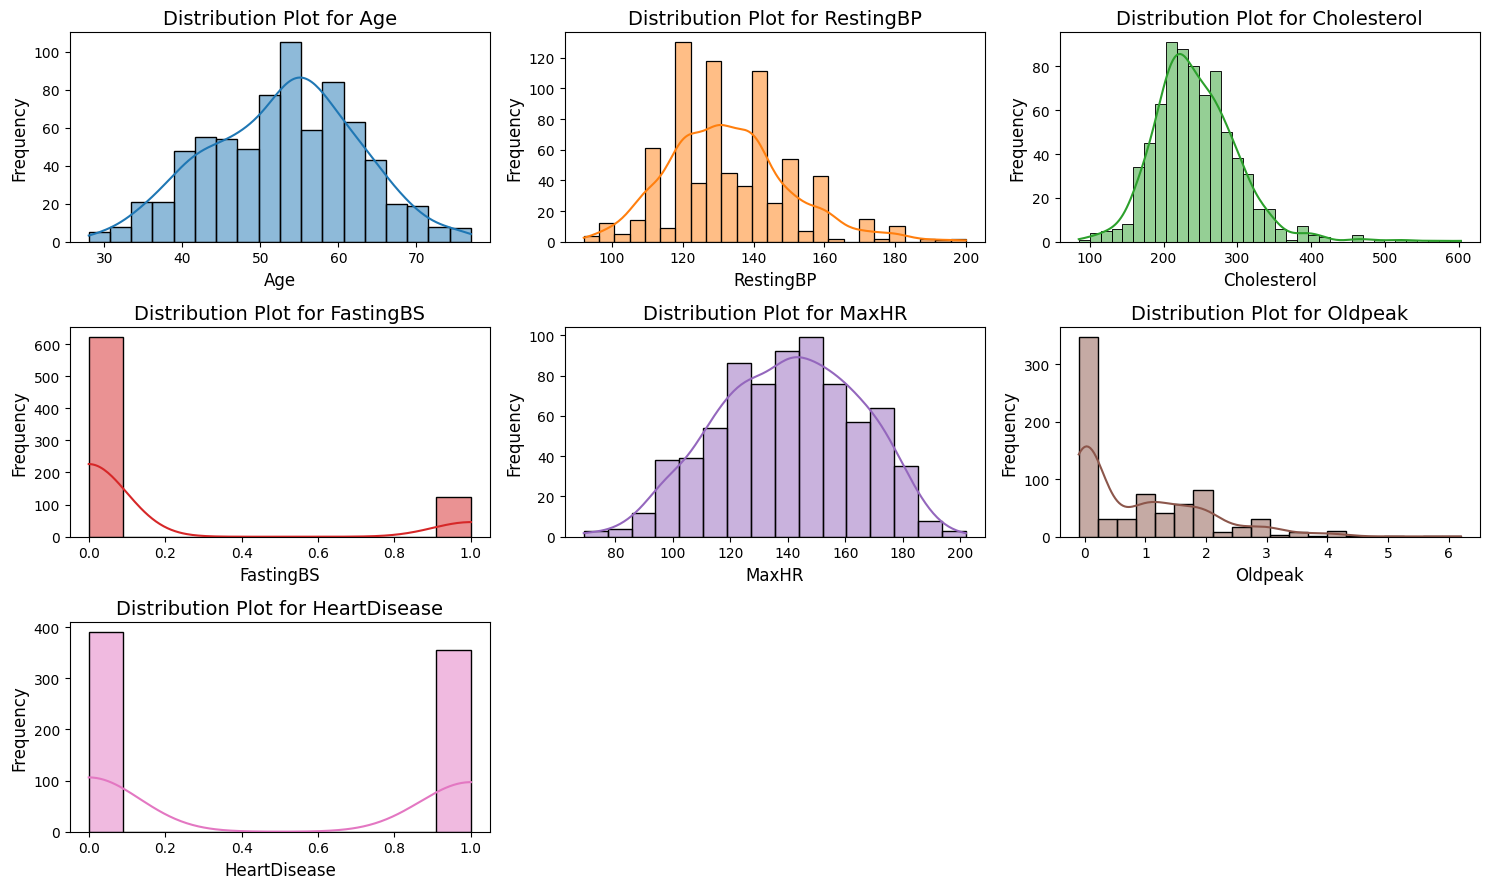

In [664]:
# Visualizing the distribution of numerical data in the dataset 

numerical_columns = df3.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numerical_columns)

rows = (num_cols + 2) // 3  
cols = 3  
fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows), dpi=100)
axes = axes.flatten()
palette = sns.color_palette('tab10', num_cols)
for i, col in enumerate(numerical_columns):
    sns.histplot(
        data=df3,
        x=col,
        kde=True,
        ax=axes[i],
        color=palette[i] 
    )
    axes[i].set_title(f'Distribution Plot for {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

Visualising the imbalance of the dataset using a Pie Chart and Box Plot

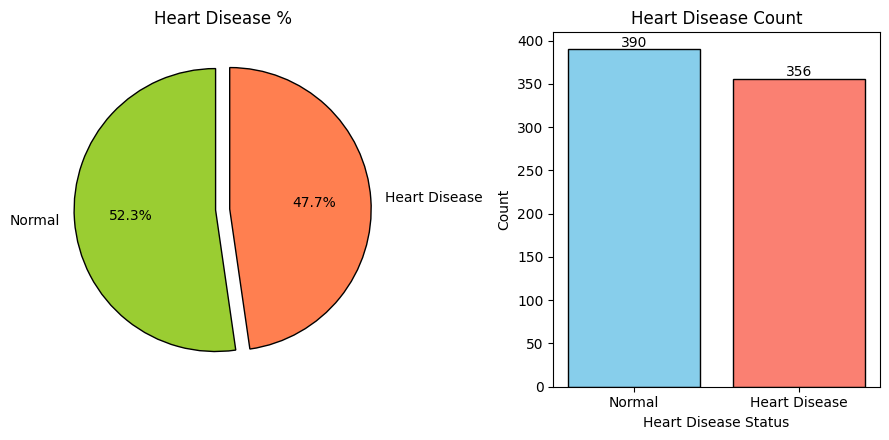

In [665]:
# Using HeartDisease as our target variable

heart_disease_counts = df3['HeartDisease'].value_counts()
labels = ['Normal', 'Heart Disease']
values = [heart_disease_counts[0], heart_disease_counts[1]]

pie_colors = ['yellowgreen', 'coral']  
bar_colors = ['skyblue', 'salmon']   

fig, axes = plt.subplots(1, 2, figsize=(9, 4.5)) 

# Pie Chart
axes[0].pie(values, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0.1, 0), 
            colors=pie_colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[0].set_title('Heart Disease %')
axes[0].axis('equal')  # Equal aspect ratio ensures the pie is circular

# Bar Chart 
bars = axes[1].bar(labels, values, color=bar_colors, edgecolor='black')
axes[1].set_title('Heart Disease Count')
axes[1].set_xlabel('Heart Disease Status')
axes[1].set_ylabel('Count')

for bar, count in zip(bars, values):    # Adding count labels on top of the bars
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, 
                 f'{count}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


The dataset is quite evenly balanced

Plotting Count plots for Categorical columns in the dataset

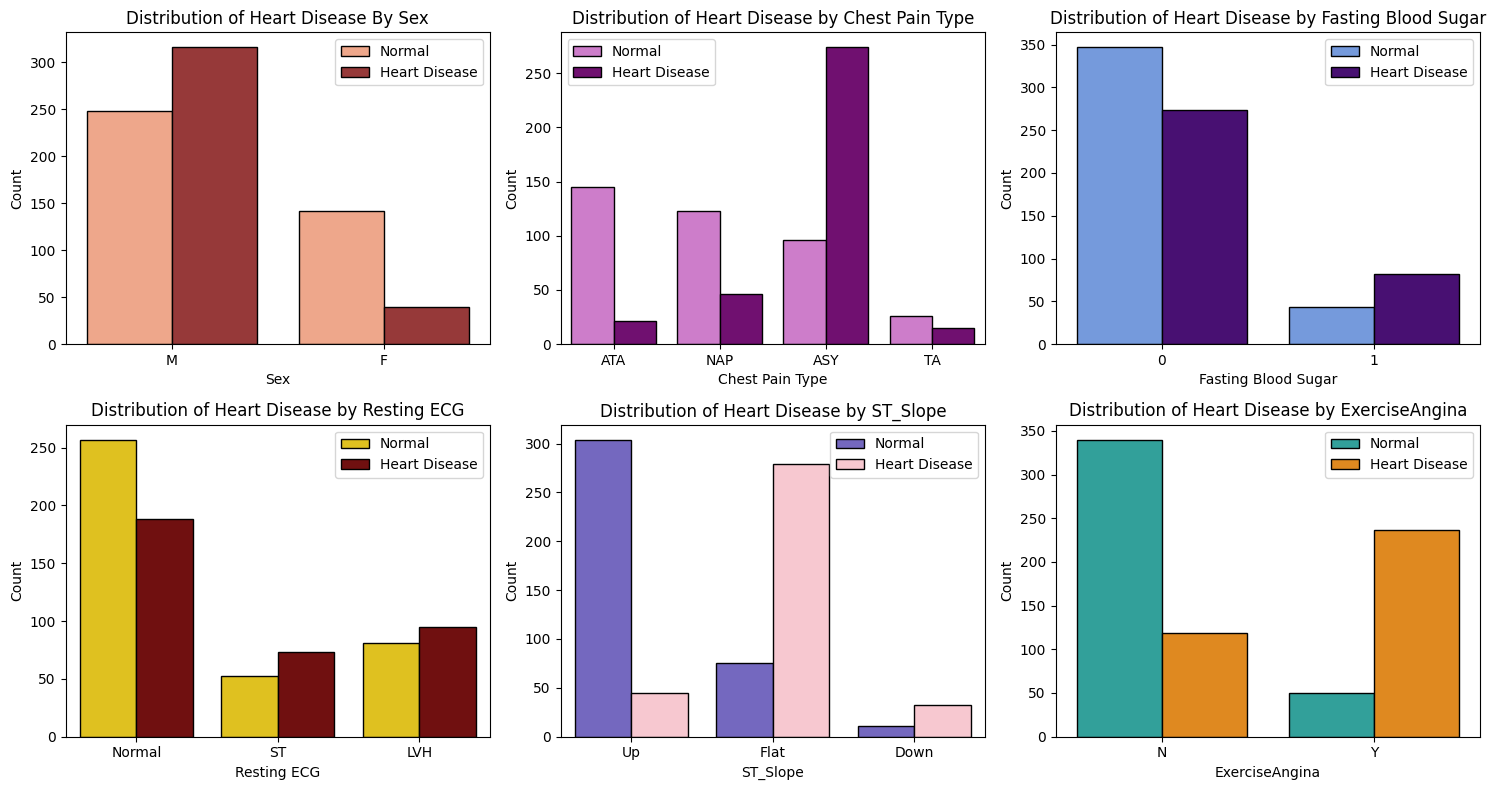

In [666]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Plot 1: Heart Disease by Sex
sns.countplot(data=df3, x='Sex', hue='HeartDisease', palette=['lightsalmon', 'brown'], 
              hue_order=[0, 1], edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Heart Disease By Sex')
axes[0, 0].set_xlabel('Sex')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(['Normal', 'Heart Disease'])

# Plot 2: Heart Disease by Chest Pain Type
sns.countplot(data=df3, x='ChestPainType', hue='HeartDisease', palette=['orchid', 'purple'], 
              hue_order=[0, 1], edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Heart Disease by Chest Pain Type')
axes[0, 1].set_xlabel('Chest Pain Type')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(['Normal', 'Heart Disease'])

# Plot 3: Heart Disease by Fasting Blood Sugar
sns.countplot(data=df3, x='FastingBS', hue='HeartDisease', palette=['cornflowerblue', '#4B0082'], 
              hue_order=[0, 1], edgecolor='black', ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Heart Disease by Fasting Blood Sugar')
axes[0, 2].set_xlabel('Fasting Blood Sugar')
axes[0, 2].set_ylabel('Count')
axes[0, 2].legend(['Normal', 'Heart Disease'])

# Plot 4: Heart Disease by Resting ECG
sns.countplot(data=df3, x='RestingECG', hue='HeartDisease', palette=['gold', 'maroon'], 
              hue_order=[0, 1], edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Heart Disease by Resting ECG')
axes[1, 0].set_xlabel('Resting ECG')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(['Normal', 'Heart Disease'])

# Plot 5: Heart Disease by ST_Slope
sns.countplot(data=df3, x='ST_Slope', hue='HeartDisease', palette=['slateblue', 'pink'],
              hue_order=[0, 1], edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Heart Disease by ST_Slope')
axes[1, 1].set_xlabel('ST_Slope')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(['Normal', 'Heart Disease'])

# Plot 6: Heart Disease by ExerciseAngina
sns.countplot(data=df3, x='ExerciseAngina', hue='HeartDisease', palette=['lightseagreen', 'darkorange'], 
              hue_order=[0, 1], edgecolor='black', ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Heart Disease by ExerciseAngina')
axes[1, 2].set_xlabel('ExerciseAngina')
axes[1, 2].set_ylabel('Count')
axes[1, 2].legend(['Normal', 'Heart Disease'])

plt.tight_layout()
plt.show()

Pie Charts to display categorical features of positive Heart Disease cases

In [667]:
# Sex distribution for Heart Disease
sex = df3[df3['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex.iloc[0] / sum(sex) * 100, sex.iloc[1] / sum(sex) * 100]

# Chest Pain Type distribution for Heart Disease
cp = df3[df3['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp.iloc[0] / sum(cp) * 100, cp.iloc[1] / sum(cp) * 100, cp.iloc[2] / sum(cp) * 100, cp.iloc[3] / sum(cp) * 100]

# Fasting Blood Sugar distribution for Heart Disease
fbs = df3[df3['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs.iloc[0] / sum(fbs) * 100, fbs.iloc[1] / sum(fbs) * 100]

# Resting ECG distribution for Heart Disease
restecg = df3[df3['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg.iloc[0] / sum(restecg) * 100, restecg.iloc[1] / sum(restecg) * 100, restecg.iloc[2] / sum(restecg) * 100]

# Exercise Angina distribution for Heart Disease
exang = df3[df3['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang.iloc[0] / sum(exang) * 100, exang.iloc[1] / sum(exang) * 100]

# ST Slope distribution for Heart Disease
slope = df3[df3['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope.iloc[0] / sum(slope) * 100, slope.iloc[1] / sum(slope) * 100, slope.iloc[2] / sum(slope) * 100]

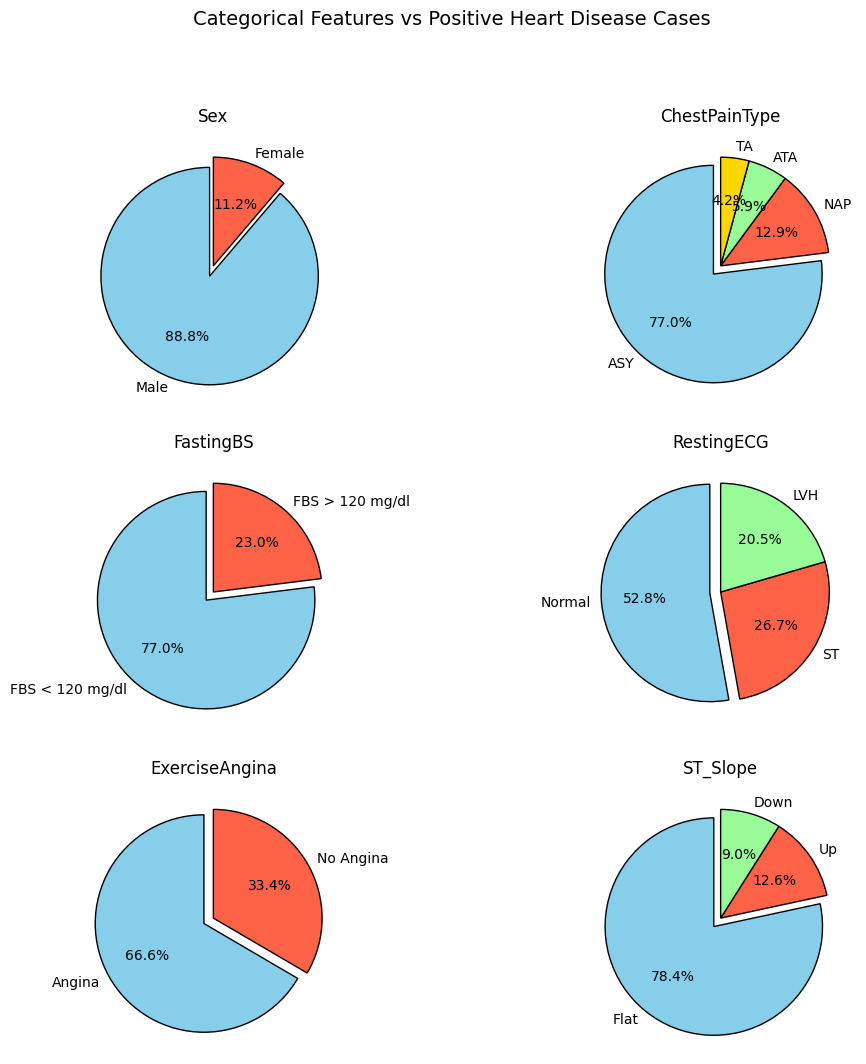

In [668]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

data = [                                                        
    (sex, ['Male', 'Female'], 'Sex'),
    (cp, ['ASY', 'NAP', 'ATA', 'TA'], 'ChestPainType'),
    (fbs, ['FBS < 120 mg/dl', 'FBS > 120 mg/dl'], 'FastingBS'),
    (restecg, ['Normal', 'ST', 'LVH'], 'RestingECG'),
    (exang, ['Angina', 'No Angina'], 'ExerciseAngina'),
    (slope, ['Flat', 'Up', 'Down'], 'ST_Slope')
]
colors = ["#87CEEB", "#FF6347", "#98FB98", "#FFD700"]


for i, (data_values, labels, title) in enumerate(data):
    plt.subplot(3, 2, i+1)
    
    explode = [0.1 if i == 0 else 0 for i in range(len(labels))]
    
    plt.pie(data_values, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}, colors=colors[:len(labels)])
    plt.title(title)
    plt.axis('off')  # Hide the axis and grid for each plot

fig.suptitle('Categorical Features vs Positive Heart Disease Cases', fontsize=14)
plt.show()

Using Histograms to visualize the Age distribution for Heart Disease and Non-heart Disease patients

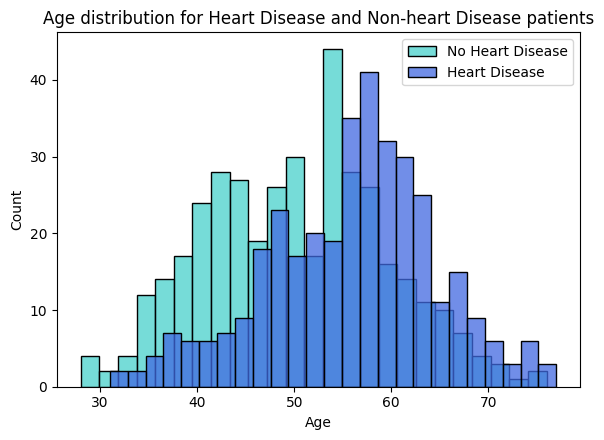

In [669]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4.5))

# Histogram
sns.histplot(data=df3[df3['HeartDisease'] == 0], x='Age', kde=False, color='mediumturquoise', label='No Heart Disease', bins=25, ax=axes)
sns.histplot(data=df3[df3['HeartDisease'] == 1], x='Age', kde=False, color='royalblue', label='Heart Disease', bins=25, ax=axes)
axes.set_title('Age distribution for Heart Disease and Non-heart Disease patients')
axes.set_xlabel('Age')
axes.set_ylabel('Count')
axes.legend()

plt.tight_layout()
plt.show()

Displaying the count of Heart Disease patients across different Age groups

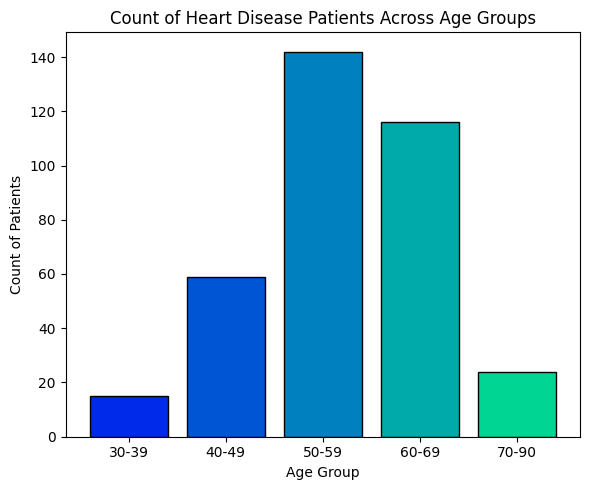

In [670]:
# Defining age categories
age_bins = [29, 39, 49, 59, 69, 90]  
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-90'] 

# Creating a new column for age category
df3['Age Group'] = pd.cut(df3['Age'], bins=age_bins, labels=age_labels, right=False)

# Filtering the dataset for heart disease patients (HeartDisease == 1)
heart_disease_patients = df3[df3['HeartDisease'] == 1]

# Calculate the count of heart disease patients in each age group
age_group_heart_disease_count = heart_disease_patients['Age Group'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(6, 5))
age_group_heart_disease_count.plot(kind='bar', 
                                   color=sns.color_palette("winter", n_colors=len(age_group_heart_disease_count)), 
                                   edgecolor='black', 
                                   alpha=1.0,
                                   width=0.8)
plt.title('Count of Heart Disease Patients Across Age Groups', fontsize=12)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Count of Patients', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Using Histograms and Violin Plots to visualize the distribution of Resting BP by Heart Disease

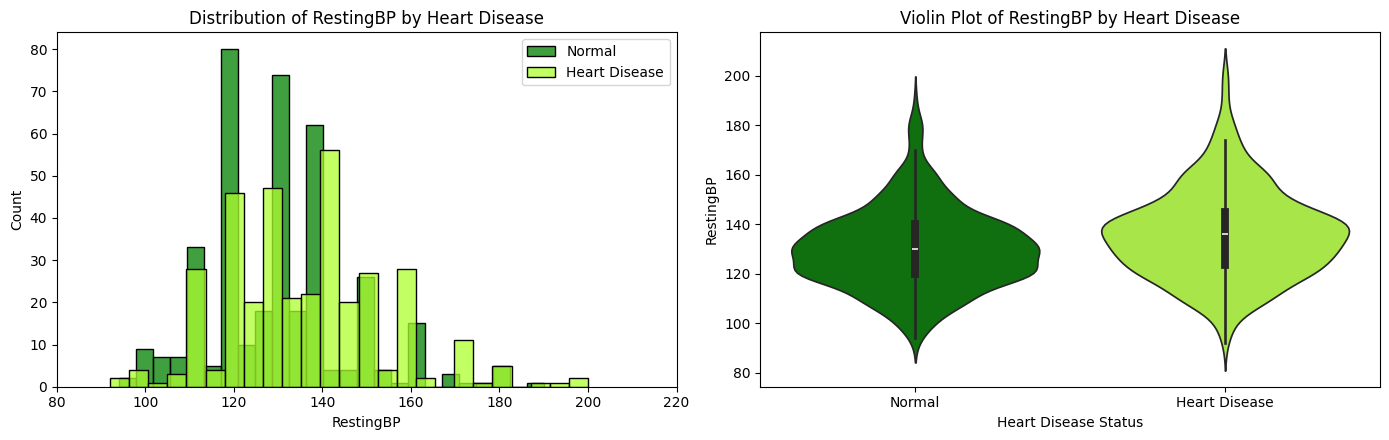

In [671]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4.5)) 

#  Histogram  
sns.histplot(df3[df3['HeartDisease'] == 0]["RestingBP"], color='green', label="No Heart Disease", bins=25, ax=axes[0])
sns.histplot(df3[df3['HeartDisease'] == 1]["RestingBP"], color='greenyellow', label="Heart Disease", bins=25, ax=axes[0])
axes[0].set_title('Distribution of RestingBP by Heart Disease')
axes[0].set_xlabel('RestingBP')
axes[0].set_ylabel('Count')
axes[0].set_xlim([80, 220])
axes[0].legend(['Normal', 'Heart Disease'])

#  Violin Plot  
sns.violinplot(data=df3, x='HeartDisease', y='RestingBP', hue='HeartDisease', palette=['green', 'greenyellow'], ax=axes[1], legend=False)
axes[1].set_title('Violin Plot of RestingBP by Heart Disease')
axes[1].set_xlabel('Heart Disease Status')
axes[1].set_ylabel('RestingBP')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Normal', 'Heart Disease'])

plt.tight_layout()
plt.show()


Using Histograms and ECDF Plots to visualize the distribution of Cholesterol by Heart Disease

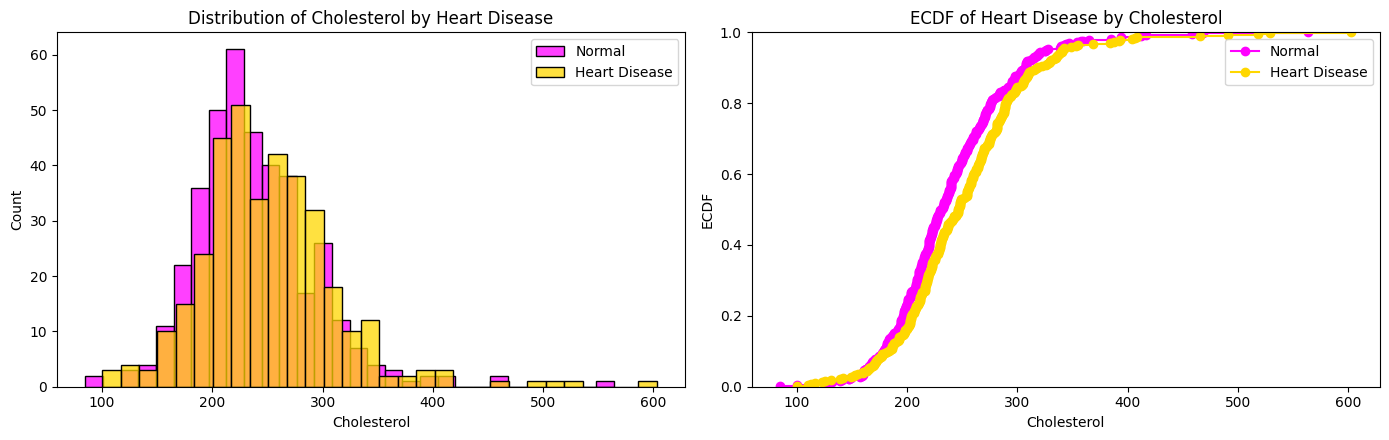

In [673]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4.5)) 

#  Histogram  
sns.histplot(df3[df3['HeartDisease'] == 0]["Cholesterol"], color='magenta', label="Normal", kde=False, bins=30, ax=axes[0])
sns.histplot(df3[df3['HeartDisease'] == 1]["Cholesterol"], color='gold', label="Heart Disease", kde=False, bins=30, ax=axes[0])
axes[0].set_title('Distribution of Cholesterol by Heart Disease')
axes[0].set_xlabel('Cholesterol')
axes[0].set_ylabel('Count')
axes[0].legend()

#  ECDF 
colors = ['magenta', 'gold']  
for i, hd in enumerate(df3['HeartDisease'].unique()):
    subset = df3[df3['HeartDisease'] == hd]['Cholesterol']
    sns.ecdfplot(subset, label=f'Heart Disease: {hd}', marker='o', color=colors[i], ax=axes[1])
axes[1].set_title('ECDF of Heart Disease by Cholesterol')
axes[1].set_xlabel('Cholesterol')
axes[1].set_ylabel('ECDF')
axes[1].legend(['Normal', 'Heart Disease'])

plt.tight_layout()
plt.show()


Using Histograms and Violin Plots to visualize the distribution of MaxHR by Heart Disease

C:\Users\DELL\AppData\Local\Temp\ipykernel_20204\2360045361.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df3, x='HeartDisease', y='MaxHR', palette=['tomato', 'seagreen'], ax=axes[1])


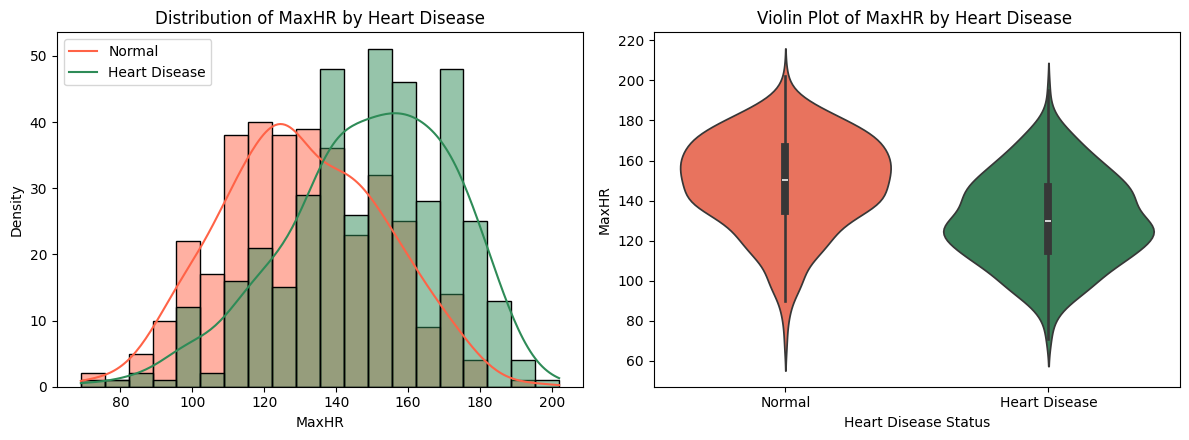

In [674]:
# Create a figure with two subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))  # 1 row, 2 columns

#  Histogram 
sns.histplot(data=df3, x='MaxHR', hue='HeartDisease', kde=True, bins=20, ax=axes[0], palette=['seagreen', 'tomato'])
axes[0].set_title('Distribution of MaxHR by Heart Disease')
axes[0].set_xlabel('MaxHR')
axes[0].set_ylabel('Density')
axes[0].legend(['Normal', 'Heart Disease'])

#  Violin Plot
sns.violinplot(data=df3, x='HeartDisease', y='MaxHR', palette=['tomato', 'seagreen'], ax=axes[1])
axes[1].set_title('Violin Plot of MaxHR by Heart Disease ')
axes[1].set_xlabel('Heart Disease Status')
axes[1].set_ylabel('MaxHR')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Normal', 'Heart Disease'])

plt.tight_layout()
plt.show()


Using Histograms and Violin Plots to visualize the distribution of Oldpeak by Heart Disease

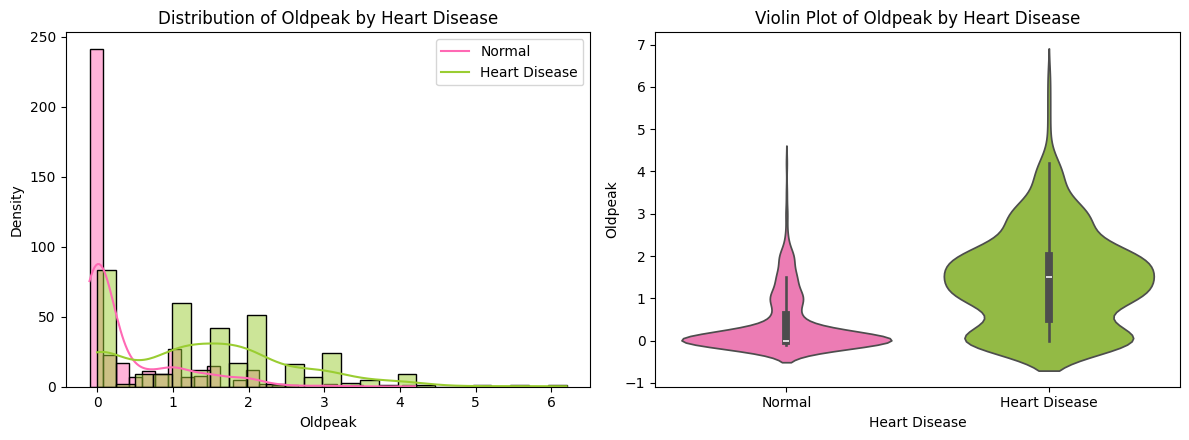

In [675]:
# Create the figure with two subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))  # 1 row, 2 columns

#  Histogram 
sns.histplot(data=df3[df3['HeartDisease'] == 0], x='Oldpeak', color='hotpink', label='Normal', bins=25, kde=True, ax=axes[0])
sns.histplot(data=df3[df3['HeartDisease'] == 1], x='Oldpeak', color='yellowgreen', label='Heart Disease', bins=25, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Oldpeak by Heart Disease')
axes[0].set_xlabel('Oldpeak')
axes[0].set_ylabel('Density')
axes[0].legend(['Normal', 'Heart Disease'])

#  Violin Plot 
sns.violinplot(x="HeartDisease", y="Oldpeak", data=df3, hue="HeartDisease", palette=["hotpink", "yellowgreen"], legend=False, ax=axes[1])
axes[1].set_title('Violin Plot of Oldpeak by Heart Disease')
axes[1].set_xlabel('Heart Disease')
axes[1].set_ylabel('Oldpeak')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Normal', 'Heart Disease'])

plt.tight_layout()
plt.show()

Displaying the Mean values of all the features for Heart Disease and Normal cases

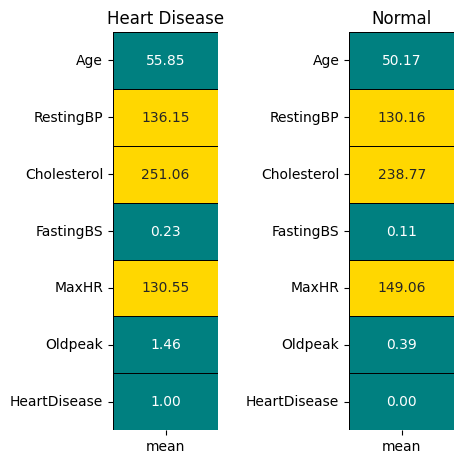

In [676]:
yes = df3[df3['HeartDisease'] == 1].describe().T
no = df3[df3['HeartDisease'] == 0].describe().T
colors = ['teal','gold']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Normal');

fig.tight_layout(pad = 2)

Evaluating the relationships between numerical features using Scatterplots

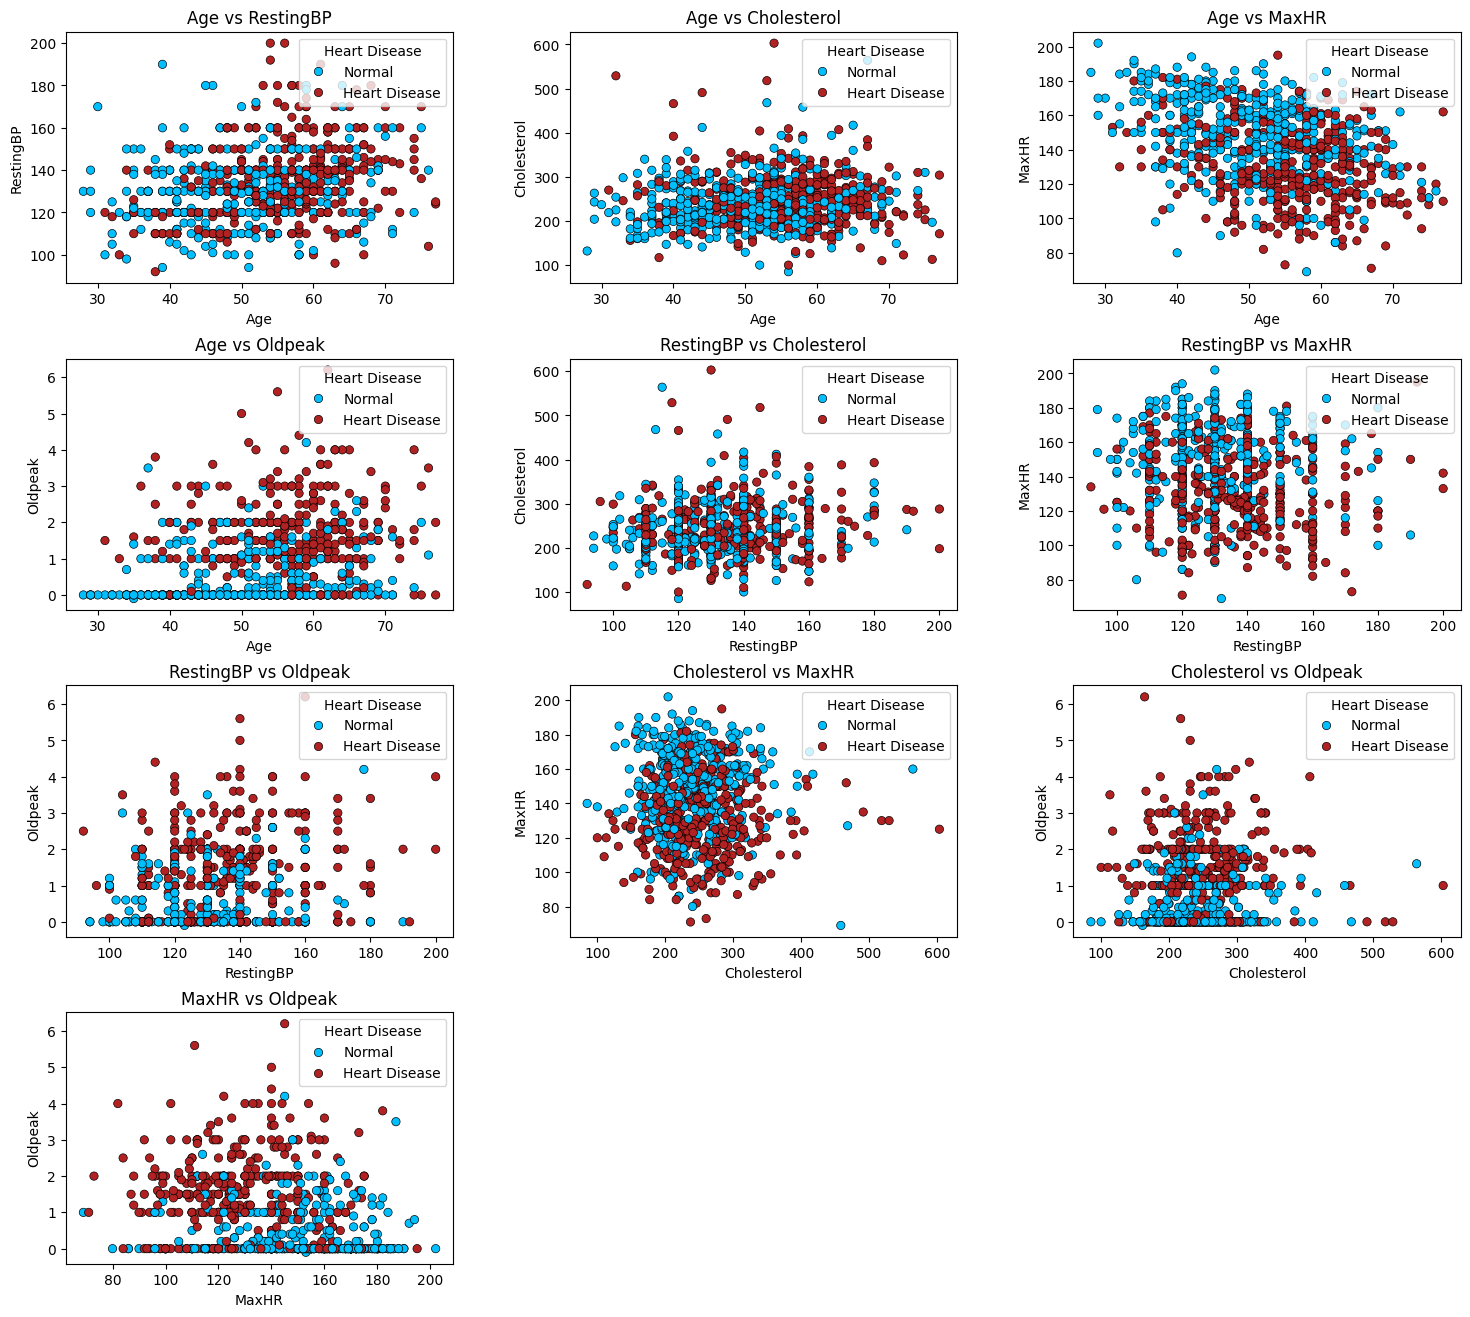

In [677]:
import math

selected_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'] # Defining the selected features
colors = ['deepskyblue', 'firebrick']  # deepskyblue for Normal, firebrick for Heart Disease


num_pairs = sum(1 for i in range(len(selected_features)) for j in range(i + 1, len(selected_features)))
ncols = 3
nrows = math.ceil(num_pairs / ncols)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
fig.subplots_adjust(hspace=0.3, wspace=0.3)  

a = 0
for i in range(len(selected_features)):
    for j in range(i + 1, len(selected_features)):
        a += 1
        plt.subplot(nrows, ncols, a)
        
        sns.scatterplot(
            x=selected_features[i],
            y=selected_features[j],
            data=df3,
            hue='HeartDisease',
            palette={0: 'deepskyblue', 1: 'firebrick'},  
            hue_order=[0, 1], 
            edgecolor='black'
        )
        
        handles, labels = plt.gca().get_legend_handles_labels()
        plt.legend(handles, ['Normal', 'Heart Disease'], title='Heart Disease', loc='upper right')
        title = f"{selected_features[i]} vs {selected_features[j]}"
        plt.title(title)

for unused_ax in range(a + 1, nrows * ncols + 1):
    fig.delaxes(ax.flatten()[unused_ax - 1])
plt.show()

Using Histograms to visualize Cholesterol levels, RestingBP levels and MaxHR levels by Age Group

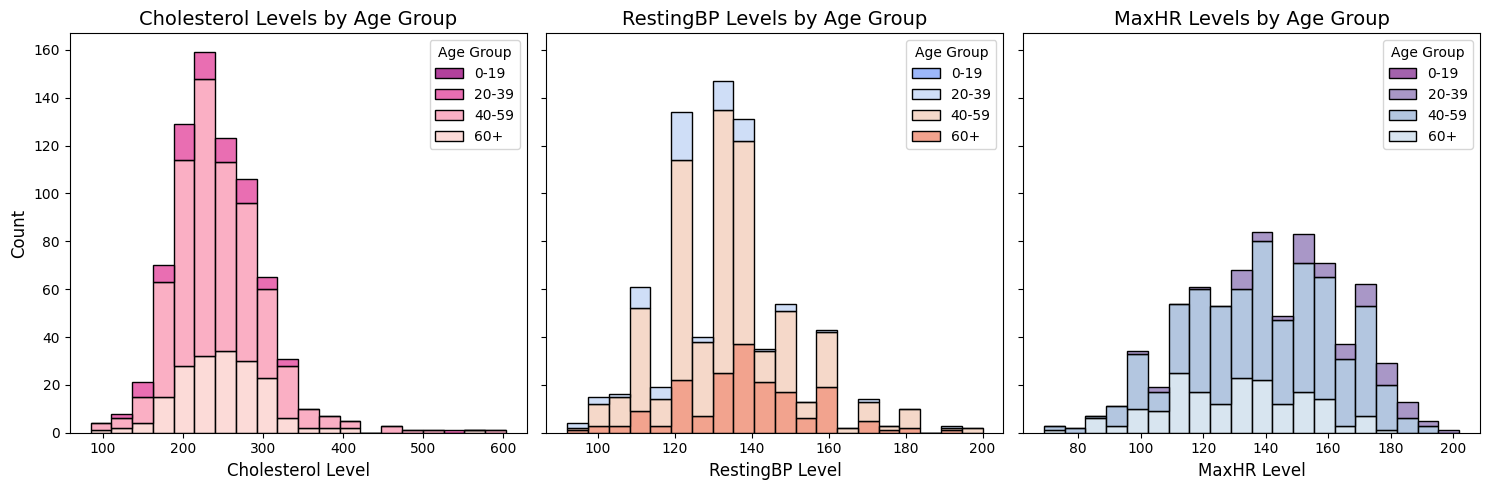

In [678]:
# Defining bin labels for age groups
age_group_labels = ['0-19', '20-39', '40-59', '60+']

df3['Age Group'] = pd.cut(df3['Age'], 
                            bins=[0, 19, 39, 59, float('inf')], 
                            labels=age_group_labels)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Histogram of Cholesterol by Age Group
sns.histplot(data=df3, x='Cholesterol', hue='Age Group', multiple='stack', palette='RdPu_r', bins=20, kde=False, ax=axes[0])
axes[0].set_title('Cholesterol Levels by Age Group', fontsize=14)
axes[0].set_xlabel('Cholesterol Level', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Histogram of RestingBP by Age Group
sns.histplot(data=df3, x='RestingBP', hue='Age Group', multiple='stack', palette='coolwarm', bins=20, kde=False, ax=axes[1])
axes[1].set_title('RestingBP Levels by Age Group', fontsize=14)
axes[1].set_xlabel('RestingBP Level', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

# Histogram of MaxHR by Age Group
sns.histplot(data=df3, x='MaxHR', hue='Age Group', multiple='stack', palette='BuPu_r', bins=20, kde=False, ax=axes[2])
axes[2].set_title('MaxHR Levels by Age Group', fontsize=14)
axes[2].set_xlabel('MaxHR Level', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

### Feature Selection

In [679]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score, roc_auc_score,
    auc, recall_score, f1_score, roc_curve, confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay


In [680]:
df3 = df3.drop(columns=['Age Group'])

In [681]:
# Selecting columns with object data type
cat_cols=df3.select_dtypes(include=['object']).columns
cat_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [682]:
# Encoding categorical variables using LabelEncoder

label_encoder = LabelEncoder()
for col in cat_cols:
    df3[col] = label_encoder.fit_transform(df3[col])

In [683]:
df3.dtypes

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object

Plotting a Heatmap to visualize the correlation matrix of the data

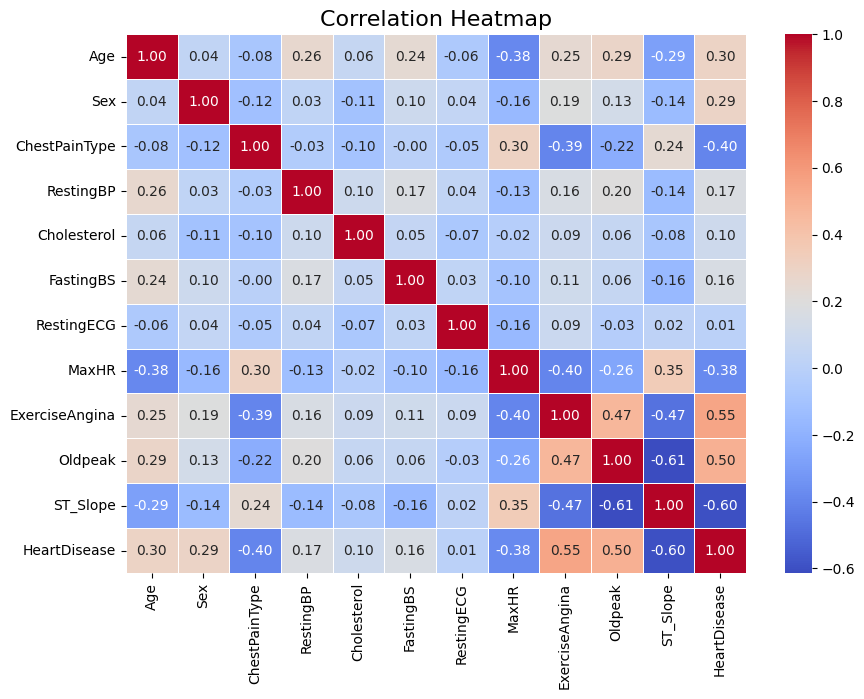

In [684]:
# Computing the correlation matrix of df3
correlation_matrix = df3.corr()

# Creating the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [685]:
# Defining the features (independent variables) as 'x' and labels (dependent variable) as 'y'

x = df3.drop(['HeartDisease'], axis=1)
y = df3['HeartDisease']

Displaying the correlations of Features vs HeartDisease using a Horizontal Bar Plot

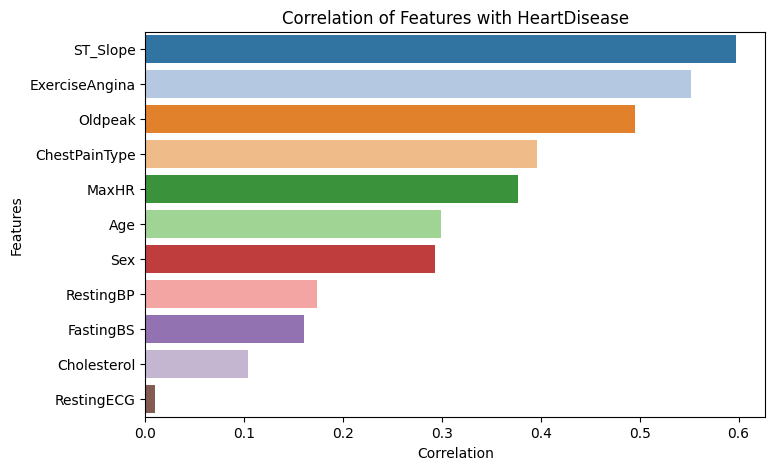

In [686]:
corr=abs(df3.corr())
plt.figure(figsize=(8, 5))
sns.barplot(x=corr["HeartDisease"].sort_values(ascending=False)[1:].values, y=corr["HeartDisease"].sort_values(ascending=False)[1:].index,palette='tab20',hue=corr["HeartDisease"].sort_values(ascending=False)[1:].index)
plt.ylabel("Features")
plt.xlabel("Correlation")
plt.title("Correlation of Features with HeartDisease")
plt.xticks(rotation=0)
plt.show()

In [687]:
# Using SelectKBest to find the best features for our model

sel = SelectKBest(k=5)
sel.fit(x, y)
fe = sel.transform(x)

Displaying the Feature Importance Scores for selected feature using a Horizontal Bar Plot

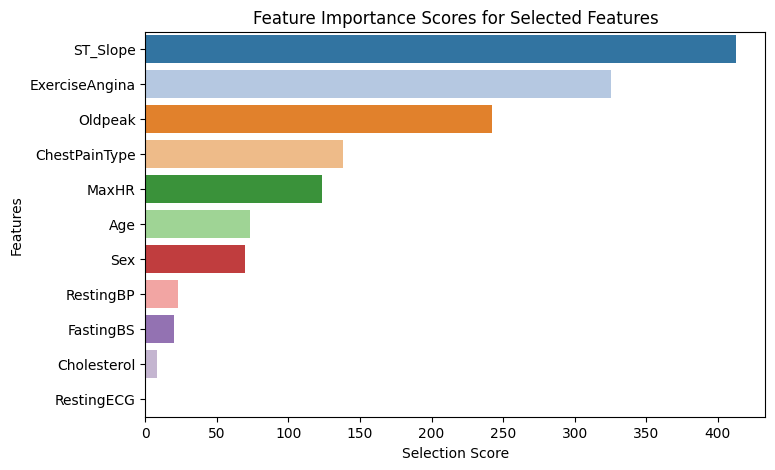

In [688]:
feature_scores = pd.DataFrame({'Columns': x.columns, 'Selection Score': sel.scores_})

plt.figure(figsize=(8,5))
palette = sns.color_palette("tab20", n_colors=len(feature_scores))

# Creating the bar plot
sns.barplot(x='Selection Score', y='Columns', data=feature_scores.sort_values('Selection Score', ascending=False), 
            palette=palette, hue='Columns', dodge=False)
plt.xlabel('Selection Score')
plt.ylabel('Features')
plt.title('Feature Importance Scores for Selected Features')
plt.show()

Since the selection score of 'RestingECG' is zero, we will drop this feature before train and test split

In [689]:
#Dropping RestingECG
X = x.drop(['RestingECG'],axis=1)
y = df3['HeartDisease']

### Model Building

In [690]:
#Splitting the dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [691]:
#Standardizing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [692]:
from catboost import CatBoostClassifier

In [693]:
# Finding the best models through evaluation metrics
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),  # Suppress verbose output
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier()
}

In [694]:
# Train and evaluate each classifier
evaluation = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)  
  
    precision = precision_score(y_test, y_pred)    # Calculating evaluation metrics
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
  
    evaluation.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
    })

model_evaluation = pd.DataFrame(evaluation)   # Converting evaluation list to DataFrame

model_evaluation = model_evaluation.sort_values(by='F1-Score', ascending=False)   # Sorting the DataFrame by descending ROC AUC score

# Display the model evaluation table using tabulate
table = tabulate(model_evaluation, headers='keys', tablefmt='fancy_grid', showindex=False)   # Displaying the model evaluation table 
print(table)

╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model               │   Accuracy │   Precision │   Recall │   F1-Score │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Logistic Regression │   0.873333 │    0.837838 │ 0.898551 │   0.867133 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Gradient Boosting   │   0.86     │    0.833333 │ 0.869565 │   0.851064 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ CatBoost            │   0.853333 │    0.821918 │ 0.869565 │   0.84507  │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Random Forest       │   0.84     │    0.808219 │ 0.855072 │   0.830986 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ XGBClassifier       │   0.826667 │    0.779221 │ 0.869565 │   0.821918 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ K-Nearest Neighbors │  

From the results above, it can be seen that Logistic Regression, Gradient Boosting and CatBoost are the best fit models for this data.

Let us explore these models individually and check the effect of Hyperparameter tuning:

## Logistic Regression

##### Hyperparameter Tuning

In [695]:
# Defining the parameter grid for Logistic Regression

param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [696]:
# Initializing Logistic Regression Classifier
logistic_classifier = LogisticRegression()

# Performing Grid Search to find the best hyperparameters
grid_search_logistic = GridSearchCV(logistic_classifier, param_grid_logistic, cv=5, scoring='roc_auc')
grid_search_logistic.fit(X_train, y_train)

best_params_logistic = grid_search_logistic.best_params_       # Getting the best hyperparameters

best_logistic_classifier = LogisticRegression(**best_params_logistic)  # Retraining the model with the best hyperparameters
best_logistic_classifier.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [697]:
# Predictions using the best Logistic Regression Classifier
y_pred_logistic_best = best_logistic_classifier.predict(X_test)

# Calculating accuracy of the best Logistic Regression model
accuracy_logistic_best = accuracy_score(y_test, y_pred_logistic_best)
print("Accuracy of the Logistic Regression Classifier with hyperparameters:", accuracy_logistic_best)

Accuracy of the Logistic Regression Classifier with hyperparameters: 0.8733333333333333



Hyperparameter tuning has not resulted in any change in the Accuracy score.

In [698]:
# Generating the classification report
report_logistic_best = classification_report(y_test, y_pred_logistic_best)

print("Classification Report for Logistic Regression:\n", report_logistic_best)

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88        81
           1       0.84      0.90      0.87        69

    accuracy                           0.87       150
   macro avg       0.87      0.88      0.87       150
weighted avg       0.88      0.87      0.87       150



Displaying the Confusion Matrix for  Logistic Regression

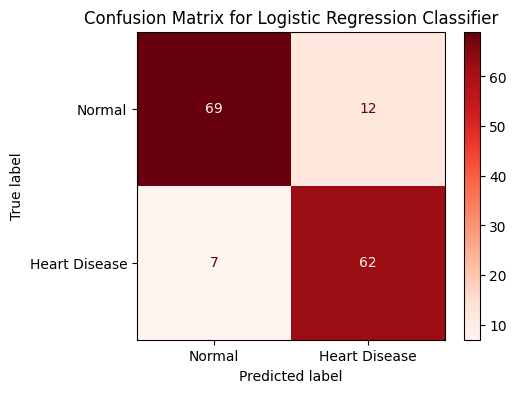

In [699]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic_best)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Heart Disease']) # Displaying the confusion matrix using ConfusionMatrixDisplay

# Plotting the matrix
plt.figure(figsize=(5, 4))
disp.plot(cmap='Reds', values_format='.3g', ax=plt.gca())
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Plotting the Receiver Operating Characteristic (ROC) curve for Logistic Regression

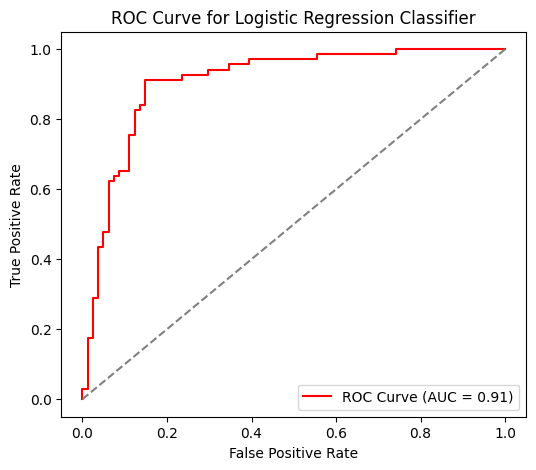

In [700]:
from sklearn.metrics import roc_curve, auc

# Getting the predicted probabilities for the positive class
y_prob = best_logistic_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)   # Calculating the ROC curve values

roc_auc = auc(fpr, tpr)  # Calculating the AUC (Area Under Curve)

# Plotting ROC curve
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, color='red', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title('ROC Curve for Logistic Regression Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [701]:
from sklearn.model_selection import cross_val_score

# Calculating accuracy of the best Logistic Regression model
accuracy_logistic_best = accuracy_score(y_test, y_pred_logistic_best)

# Calculating ROC AUC score
roc_auc_logistic_best = roc_auc_score(y_test, y_pred_logistic_best)

# Performing cross-validation to get the average score
cv_scores = cross_val_score(best_logistic_classifier, X_train, y_train, cv=5, scoring='accuracy')
cv_score_logistic_best = cv_scores.mean() * 100  # Convert to percentage

print(f"Model (Logistic Regression) Accuracy: {accuracy_logistic_best * 100:.2f}%")
print(f"Cross Validation Score: {cv_score_logistic_best:.2f}%")
print(f"ROC_AUC Score: {roc_auc_logistic_best * 100:.2f}%")

Model (Logistic Regression) Accuracy: 87.33%
Cross Validation Score: 84.23%
ROC_AUC Score: 87.52%


## Gradient Boosting

##### Hyperparameter Tuning

In [702]:
# Defining the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [703]:
# Initializing Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Performing Grid Search to find the best hyperparameters
grid_search_gb = GridSearchCV(gb_classifier, param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Getting the best hyperparameters
best_params_gb = grid_search_gb.best_params_

# Retraining the model with the best hyperparameters
best_gb_classifier = GradientBoostingClassifier(**best_params_gb)
best_gb_classifier.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=4)

In [704]:
# Predictions using the best Gradient Boosting model
y_pred_gb_best = best_gb_classifier.predict(X_test)

# Calculating accuracy
accuracy_gb_best = accuracy_score(y_test, y_pred_gb_best)
print("Accuracy of the Gradient Boosting Classifier with hyperparameters:", accuracy_gb_best)

Accuracy of the Gradient Boosting Classifier with hyperparameters: 0.8466666666666667


The default model configuration will be used as hyperparameter tuning did not lead to an improvement in the Accuracy score.

In [705]:
# Fitting the model 
gb_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred_gb = gb_classifier.predict(X_test)

Displaying the Confusion Matrix for Gradient Boosting

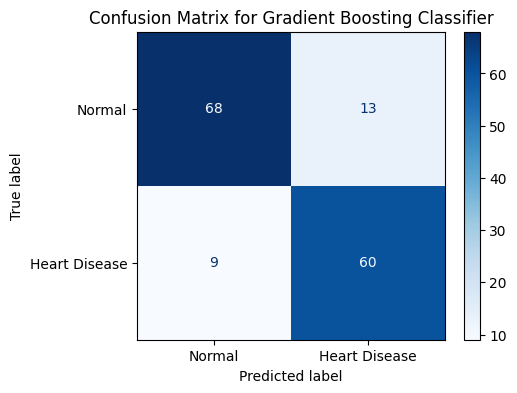

In [706]:
# Generating confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=['Normal', 'Heart Disease']) # Display confusion matrix using ConfusionMatrixDisplay
                                 
# Plotting the matrix
plt.figure(figsize=(5, 4))
disp_gb.plot(cmap='Blues', values_format='.3g', ax=plt.gca())
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Plotting the Receiver Operating Characteristic (ROC) curve for Gradient Boosting

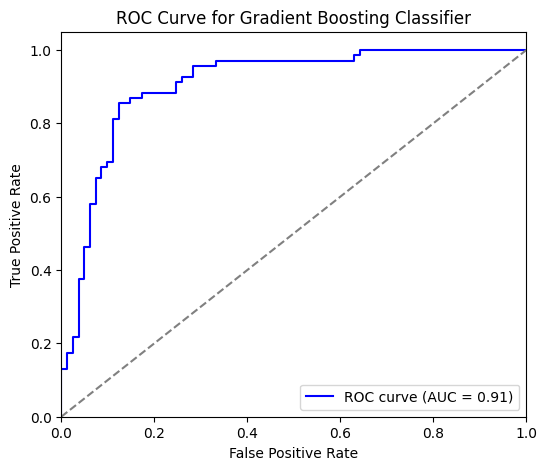

In [ ]:
# Making predictions on the test data
y_pred_prob_gb = gb_classifier.predict_proba(X_test)[:, 1]  # Get the probability for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gb)  # Computing ROC curve

roc_auc_gb = auc(fpr, tpr)  # Computing AUC (Area Under the Curve)

# Plotting ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.show()

In [708]:
# Making predictions on the test data
y_pred_gb_best = gb_classifier.predict(X_test)

# Calculating accuracy of the Gradient Boosting model
accuracy_gb_best = accuracy_score(y_test, y_pred_gb_best)

# Calculating ROC AUC score for Gradient Boosting model
roc_auc_gb_best = roc_auc_score(y_test, y_pred_gb_best)

# Performing cross-validation to get the average score
cv_scores = cross_val_score(gb_classifier, X_train, y_train, cv=5, scoring='accuracy')
cv_score_gb_best = cv_scores.mean() * 100 

print(f"Model (Gradient Boosting) Accuracy: {accuracy_gb_best * 100:.2f}%")
print(f"Cross Validation Score: {cv_score_gb_best:.2f}%")
print(f"ROC_AUC Score: {roc_auc_gb_best * 100:.2f}%")

Model (Gradient Boosting) Accuracy: 85.33%
Cross Validation Score: 87.08%
ROC_AUC Score: 85.45%


## CatBoostClassifier 

##### Hyperparameter Tuning

In [709]:
# Defining the parameter grid for CatBoost
param_grid_cb = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7]
}

Displaying the Confusion Matrix for CatBoost Classifier

In [710]:
# Initializing CatBoost Classifier
cb_classifier = CatBoostClassifier(verbose=0)

# Performing Grid Search to find the best hyperparameters
grid_search_cb = GridSearchCV(cb_classifier, param_grid_cb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_cb.fit(X_train, y_train)

# Getting the best hyperparameters
best_params_cb = grid_search_cb.best_params_

# Retraining the model with the best hyperparameters
best_cb_classifier = CatBoostClassifier(**best_params_cb, verbose=0)
best_cb_classifier.fit(X_train, y_train)

In [711]:
# Predictions using the best CatBoost model
y_pred_cb_best = best_cb_classifier.predict(X_test)

# Calculating accuracy
accuracy_cb_best = accuracy_score(y_test, y_pred_cb_best)
print("Accuracy of the CatBoost Classifier with hyperparameters:", accuracy_cb_best)

Accuracy of the CatBoost Classifier with hyperparameters: 0.8533333333333334



Hyperparameter tuning has not resulted in any change in the Accuracy score.

In [712]:
# Fitting the model 
cb_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred_cb = cb_classifier.predict(X_test)

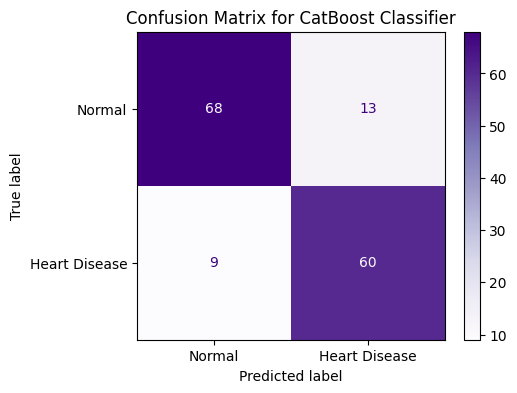

In [713]:
# Making predictions on the test data
y_pred_rf = cb_classifier.predict(X_test)

# Generating the confusion matrix
cm_cb = confusion_matrix(y_test, y_pred_cb)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_cb, display_labels=['Normal', 'Heart Disease']) #Displaying confusion matrix using ConfusionMatrixDisplay

# Plotting the matrix
plt.figure(figsize=(5, 4))
disp_rf.plot(cmap='Purples', values_format='.3g', ax=plt.gca())
plt.title('Confusion Matrix for CatBoost Classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Plotting the Receiver Operating Characteristic (ROC) curve for CatBoost Classifier

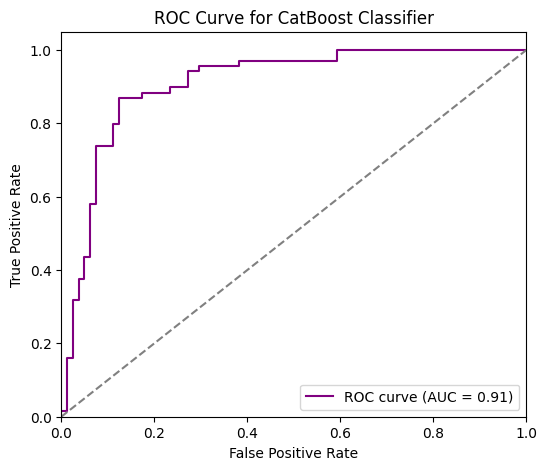

In [714]:
# Making predictions using the Random Forest model
y_pred_prob_rf = cb_classifier.predict_proba(X_test)[:, 1]  # Get the probability for the positive class

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf) # Computing ROC curve

roc_auc_rf = auc(fpr_rf, tpr_rf) #Computing AUC (Area Under the Curve)

# Plotting ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, color='purple', label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CatBoost Classifier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Making predictions on the test data using CatBoost Classifier model
y_pred_rf_best = cb_classifier.predict(X_test)

# Calculaing accuracy of the CatBoost Classifier model
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)

# Calculating ROC AUC score for CatBoost Classifier model
roc_auc_rf_best = roc_auc_score(y_test, y_pred_rf_best)

# Performing cross-validation to get the average score
cv_scores = cross_val_score(cb_classifier, X_train, y_train, cv=5, scoring='accuracy')
cv_score_rf_best = cv_scores.mean() * 100  # Convert to percentage

print(f"Model (CatBoost Classifier) Accuracy: {accuracy_rf_best * 100:.2f}%")
print(f"Cross Validation Score: {cv_score_rf_best:.2f}%")
print(f"ROC_AUC Score: {roc_auc_rf_best * 100:.2f}%")

Model (CatBoost Classifier) Accuracy: 85.33%
Cross Validation Score: 85.91%
ROC_AUC Score: 85.45%


## Random Forest

##### Hyperparameter Tuning

In [716]:
# Defining the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [717]:
# Initializing Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Performing Grid Search to find the best hyperparameters
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Getting the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Retraining the model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params_rf)
best_rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=300)

In [718]:
# Predictions using the best Random Forest model
y_pred_rf_best = best_rf_classifier.predict(X_test)

# Calculating accuracy
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print("Accuracy of the Random Forest Classifier with hyperparameters:", accuracy_rf_best)

Accuracy of the Random Forest Classifier with hyperparameters: 0.86



The tuned model configuration will be used, since hyperparameter tuning has resulted in an improvement in the R-squared score.

Displaying the Confusion Matrix for Random Forest

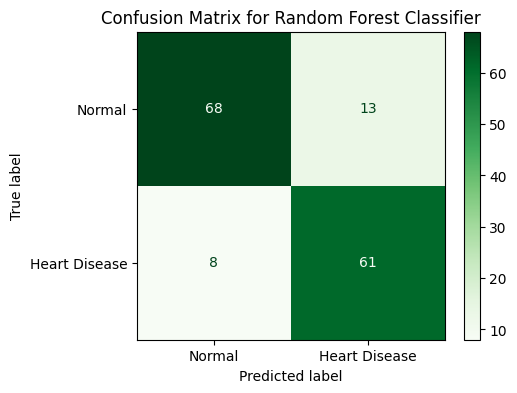

In [719]:
# Generating the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf_best)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Normal', 'Heart Disease']) #Displaying confusion matrix using ConfusionMatrixDisplay

# Plotting the matrix
plt.figure(figsize=(5, 4))
disp_rf.plot(cmap='Greens', values_format='.3g', ax=plt.gca())
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Plotting the Receiver Operating Characteristic (ROC) curve for Random Forest

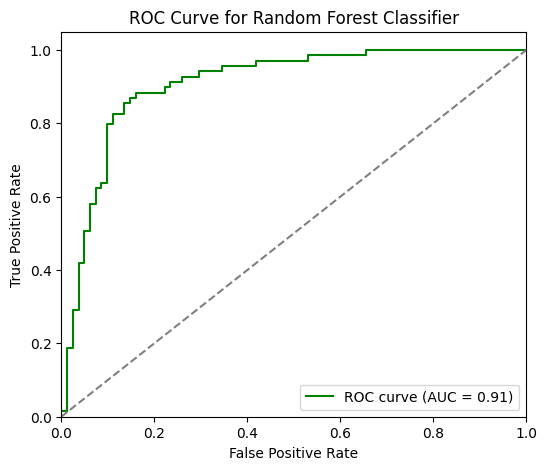

In [ ]:
# Making predictions using the Random Forest model
y_pred_prob_rf = best_rf_classifier.predict_proba(X_test)[:, 1]  # Get the probability for the positive class

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf) # Computing ROC curve

roc_auc_rf = auc(fpr_rf, tpr_rf) #Computing AUC (Area Under the Curve)

# Plotting ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Making predictions on the test data using Random Forest model
y_pred_rf_best = best_rf_classifier.predict(X_test)

# Calculaing accuracy of the Random Forest model
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)

# Calculating ROC AUC score for Random Forest model
roc_auc_rf_best = roc_auc_score(y_test, y_pred_rf_best)

# Performing cross-validation to get the average score
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
cv_score_rf_best = cv_scores.mean() * 100  # Convert to percentage

print(f"Model (Random Forest) Accuracy: {accuracy_rf_best * 100:.2f}%")
print(f"Cross Validation Score: {cv_score_rf_best:.2f}%")
print(f"ROC_AUC Score: {roc_auc_rf_best * 100:.2f}%")

Model (Random Forest) Accuracy: 86.00%
Cross Validation Score: 85.57%
ROC_AUC Score: 86.18%


### XGBoost Classifier

##### Hyperparameter Tuning

In [722]:
# Defining the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [723]:
# Initializing XGBoost Classifier
xgb_classifier = XGBClassifier(eval_metric='logloss')

# Performing Grid Search to find the best hyperparameters
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Getting the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_

# Retraining the model with the best hyperparameters
best_xgb_classifier = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss')
best_xgb_classifier.fit(X_train, y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:25:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [724]:
# Predictions using the best XGBoost model
y_pred_xgb_best = best_xgb_classifier.predict(X_test)

# Calculating accuracy
accuracy_xgb_best = accuracy_score(y_test, y_pred_xgb_best)
print("Accuracy of the XGBoost Classifier with hyperparameters:", accuracy_xgb_best)

Accuracy of the XGBoost Classifier with hyperparameters: 0.86


The tuned model configuration will be used, since hyperparameter tuning has resulted in an improvement in the R-squared score.

Displaying the Confusion Matrix for XGBoost

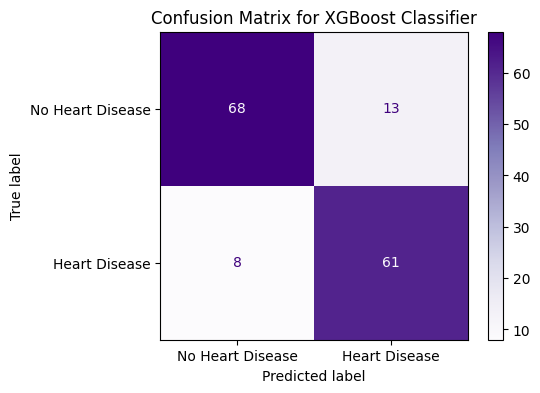

In [725]:
# Generating confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb_best)

disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['No Heart Disease', 'Heart Disease']) #Displaying confusion matrix using ConfusionMatrixDisplay

# Plotting the matrix
plt.figure(figsize=(5, 4))
disp_xgb.plot(cmap='Purples', values_format='.3g', ax=plt.gca())
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Plotting the Receiver Operating Characteristic (ROC) curve for XGBoost

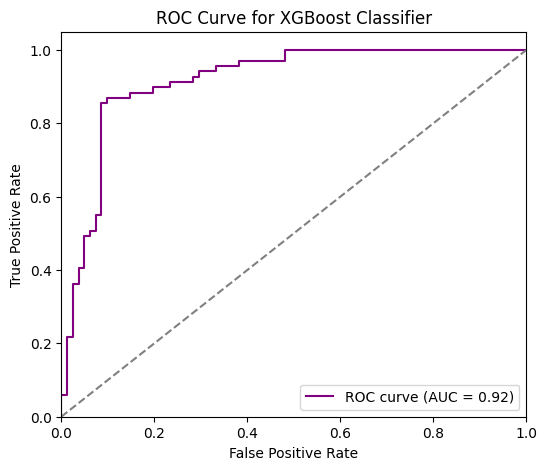

In [ ]:
#  Making predictions on the test data 
y_pred_prob_xgb = best_xgb_classifier.predict_proba(X_test)[:, 1]   # Get probability for the positive class

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb) # Computing ROC curve

roc_auc_xgb = auc(fpr_xgb, tpr_xgb)  # Computing AUC (Area Under the Curve)

# Plotting ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr_xgb, tpr_xgb, color='purple', label=f'ROC curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

In [727]:
# Making predictions on the test data using XGBoost model
y_pred_xgb_best = best_xgb_classifier.predict(X_test)

# Calculating accuracy of the XGBoost model
accuracy_xgb_best = accuracy_score(y_test, y_pred_xgb_best)

# Calculating ROC AUC score for XGBoost model
roc_auc_xgb_best = roc_auc_score(y_test, y_pred_xgb_best)

# Performing cross-validation to get the average score
cv_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='accuracy')
cv_score_xgb_best = cv_scores.mean() * 100  # Convert to percentage

print(f"Model (XGBoost) Accuracy: {accuracy_xgb_best * 100:.2f}%")
print(f"Cross Validation Score: {cv_score_xgb_best:.2f}%")
print(f"ROC_AUC Score: {roc_auc_xgb_best * 100:.2f}%")

Model (XGBoost) Accuracy: 86.00%
Cross Validation Score: 86.58%
ROC_AUC Score: 86.18%


 ## K-Nearest Neighbors

##### Hyperparameter Tuning

In [728]:
# Defining the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2]
}

In [729]:
# Initializing KNN Classifier
knn_classifier = KNeighborsClassifier()

# Performing Grid Search to find the best hyperparameters
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Getting the best hyperparameters
best_params_knn = grid_search_knn.best_params_

# Retraining the model with the best hyperparameters
best_knn_classifier = KNeighborsClassifier(**best_params_knn)
best_knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')

In [730]:
# Predictions using the best KNN model
y_pred_knn_best = best_knn_classifier.predict(X_test)

# Calculating accuracy
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
print("Accuracy of the KNN Classifier with hyperparameters:", accuracy_knn_best)


Accuracy of the KNN Classifier with hyperparameters: 0.8466666666666667


The tuned model configuration will be used, since hyperparameter tuning has resulted in an improvement in the R-squared score.

Displaying the Confusion Matrix for K-Nearest Neighbors

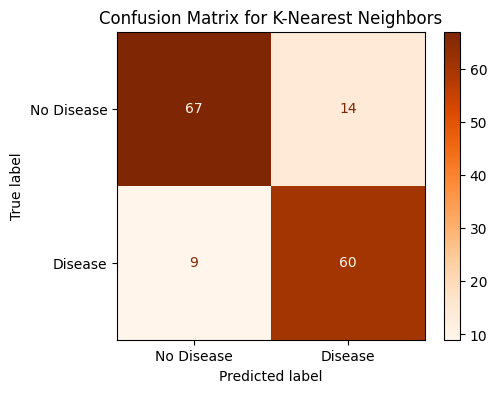

In [731]:
# Generating the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn_best)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['No Disease', 'Disease'])  #Displaying confusion matrix using ConfusionMatrixDisplay

# Plotting the matrix
plt.figure(figsize=(5, 4))
disp_knn.plot(cmap='Oranges', values_format='.3g', ax=plt.gca())
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Plotting the Receiver Operating Characteristic (ROC) curve for K-Nearest Neighbors

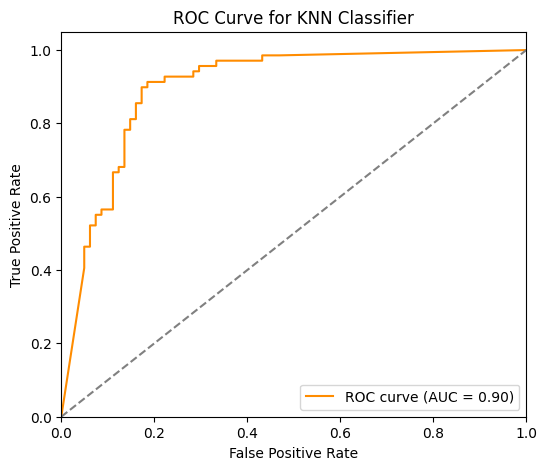

In [ ]:
# Making predictions on the test data 
y_pred_prob_knn = best_knn_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for positive class

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)  # Computing ROC curve

roc_auc_knn = auc(fpr_knn, tpr_knn) # Computing AUC (Area Under the Curve)

# Plotting ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_knn, tpr_knn, color='darkorange', label=f'ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc="lower right")
plt.show()

In [733]:
# Make predictions on the test data using KNN model
y_pred_knn_best = best_knn_classifier.predict(X_test)

# Calculating accuracy of the KNN model
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)

# Calculating ROC AUC score for KNN model
roc_auc_knn_best = roc_auc_score(y_test, y_pred_knn_best)

# Performing cross-validation to get the average score
cv_scores = cross_val_score(best_knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
cv_score_knn_best = cv_scores.mean() * 100  # Convert to percentage

print(f"Model (K-Nearest Neighbors) Accuracy: {accuracy_knn_best * 100:.2f}%")
print(f"Cross Validation Score: {cv_score_knn_best:.2f}%")
print(f"ROC_AUC Score: {roc_auc_knn_best * 100:.2f}%")

Model (K-Nearest Neighbors) Accuracy: 84.67%
Cross Validation Score: 86.08%
ROC_AUC Score: 84.84%


## Decision Tree   

##### Hyperparameter Tuning

In [734]:
# Defining the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

In [735]:
# Initializing Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Performing Grid Search to find the best hyperparameters
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Getting the best hyperparameters
best_params_dt = grid_search_dt.best_params_

# Retraining the model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=20,
                       random_state=42, splitter='random')

In [736]:
# Predictions using the best Decision Tree model
y_pred_dt_best = best_dt_classifier.predict(X_test)

# Calculating accuracy
accuracy_dt_best = accuracy_score(y_test, y_pred_dt_best)
print("Accuracy of the Decision Tree Classifier with hyperparameters:", accuracy_dt_best)


Accuracy of the Decision Tree Classifier with hyperparameters: 0.8133333333333334


The tuned model configuration will be used, since hyperparameter tuning has resulted in an improvement in the R-squared score.

Displaying the Confusion Matrix for Decision Tree

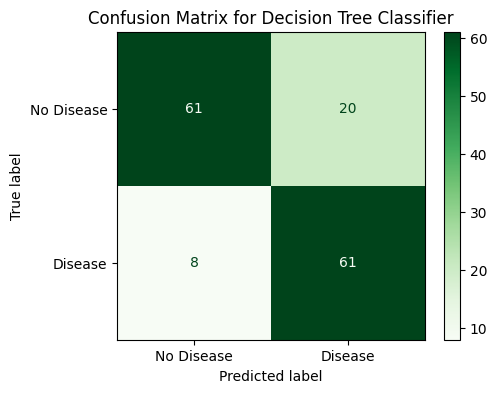

In [737]:
# Generating the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt_best)

disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['No Disease', 'Disease'])  # Displaying confusion matrix using ConfusionMatrixDisplay

# Plotting the matrix
plt.figure(figsize=(5, 4))
disp_dt.plot(cmap='Greens', values_format='.3g', ax=plt.gca())
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Plotting the Receiver Operating Characteristic (ROC) curve for Decision Tree

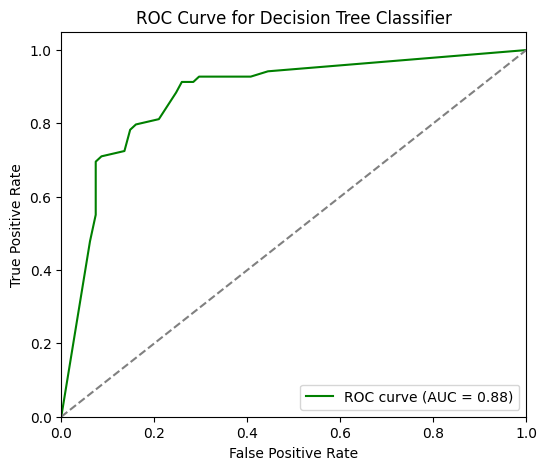

In [ ]:
# Making predictions on the test data 
y_pred_prob_dt = best_dt_classifier.predict_proba(X_test)[:, 1]  # Probability for positive class

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)  # Computing ROC curve

roc_auc_dt = auc(fpr_dt, tpr_dt)  # Computing AUC (Area Under the Curve)

# Plotting ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_dt, tpr_dt, color='green', label=f'ROC curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line 

plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

In [739]:
# Make predictions on the test data using Decision Tree model
y_pred_dt_best = best_dt_classifier.predict(X_test)

# Calculating accuracy of the Decision Tree model
accuracy_dt_best = accuracy_score(y_test, y_pred_dt_best)

# Calculating ROC AUC score for Decision Tree model
roc_auc_dt_best = roc_auc_score(y_test, y_pred_dt_best)

# Performing cross-validation to get the average score
cv_scores_dt = cross_val_score(best_dt_classifier, X_train, y_train, cv=5, scoring='accuracy')
cv_score_dt_best = cv_scores_dt.mean() * 100  # Convert to percentage

print(f"Model (Decision Tree) Accuracy: {accuracy_dt_best * 100:.2f}%")
print(f"Cross Validation Score: {cv_score_dt_best:.2f}%")
print(f"ROC_AUC Score: {roc_auc_dt_best * 100:.2f}%")


Model (Decision Tree) Accuracy: 81.33%
Cross Validation Score: 85.91%
ROC_AUC Score: 81.86%


### Plotting the ROC Curves for all the models for comparison purposes

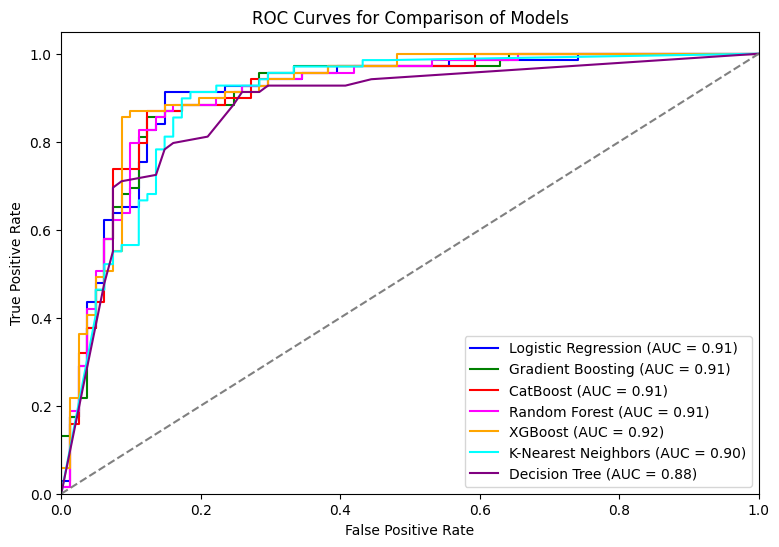

In [ ]:
# Initializing a dictionary to hold the classifiers and their corresponding labels
classifiers = {
    'Logistic Regression': best_logistic_classifier,
    'Gradient Boosting': gb_classifier,
    'CatBoost' : cb_classifier,
    'Random Forest': best_rf_classifier,
    'XGBoost': best_xgb_classifier,
    'K-Nearest Neighbors': best_knn_classifier,
    'Decision Tree': best_dt_classifier
}
colors = ['blue', 'green', 'red', 'magenta', 'orange', 'cyan', 'purple']   # Defining colors for each classifier
plt.figure(figsize=(9, 6))

for (label, clf), color in zip(classifiers.items(), colors):
    y_pred_prob = clf.predict_proba(X_test)[:, 1]    # Getting the predicted probabilities for the positive class (class 1)
    
    # Computing the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    
    # Computing the AUC score
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})', color=color)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')   # Diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Comparison of Models')
plt.legend(loc="lower right")
plt.show()

### Comparison of Model Performance Metrics

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:25:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


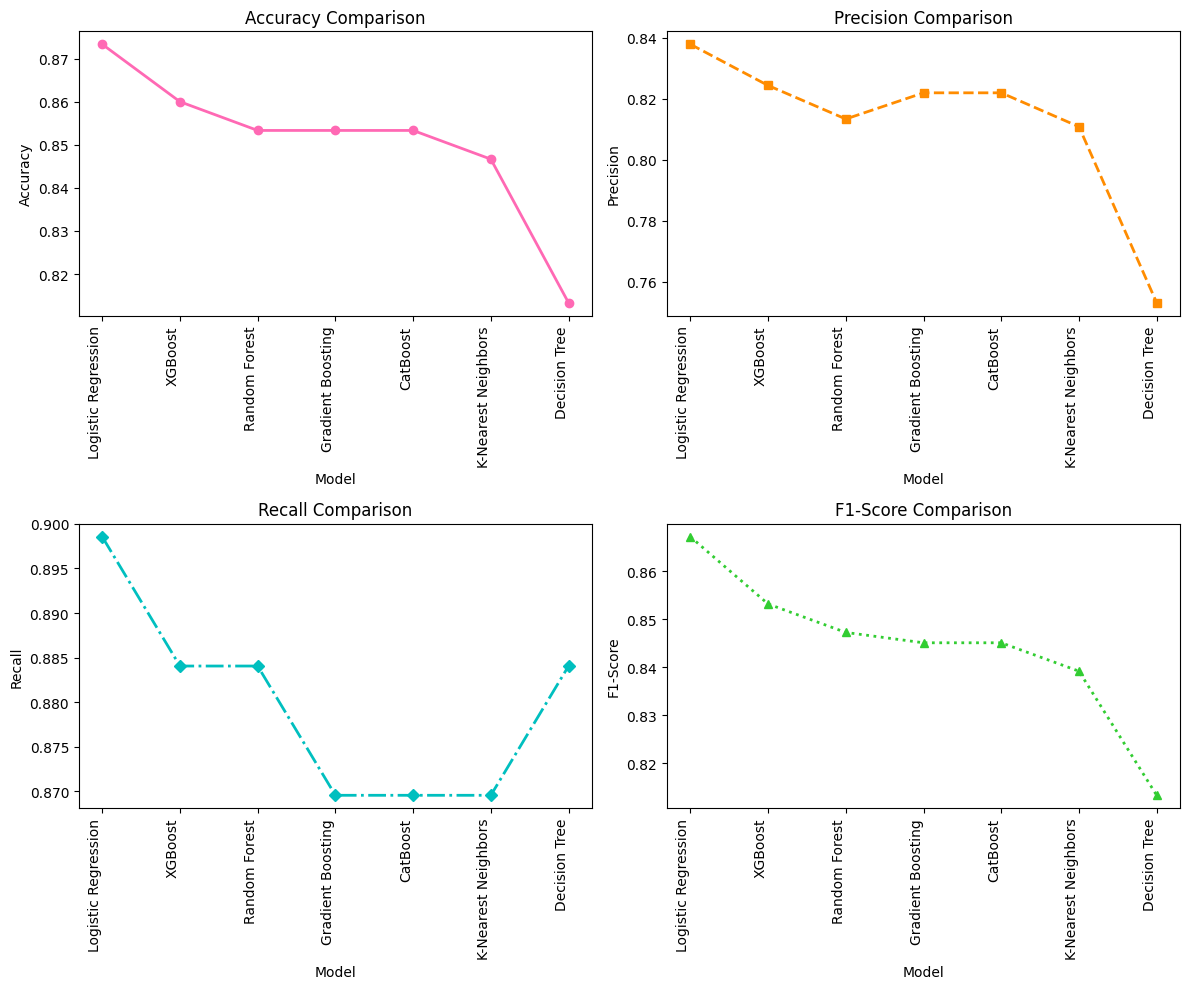

In [741]:
# Training & evaluate models
evaluation = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)  

    evaluation.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

# Converting evaluation to DataFrame & sorting by F1-Score
df = pd.DataFrame(evaluation).sort_values(by='F1-Score', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['hotpink', 'darkorange', 'c', 'limegreen']
linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^']

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]  
    ax.plot(df['Model'], df[metric], marker=markers[i], color=colors[i], linestyle=linestyles[i], linewidth=2, markersize=6, label=metric)
    ax.set_title(f'{metric} Comparison', fontsize=12)
    ax.set_xlabel('Model', fontsize=10)
    ax.set_ylabel(metric, fontsize=10)
    ax.set_xticks(range(len(df)))
    ax.set_xticklabels(df['Model'], rotation=90, ha='right')

plt.tight_layout()
plt.show()

In conclusion, Logistic Regression is the best model across all metrics (accuracy, precision, recall, F1-score).                                                               
Gradient Boosting, Random Forest and XGB Classifier are also strong choices, but slightly behind Logistic Regression.

Decision Tree performs the worst across all metrics, making it the least suitable model for this dataset.